# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import keras

In [2]:
dataset= pd.read_csv("UNSW-BotIOT.csv",low_memory=False)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               fl

# Data Preprocessing

In [6]:
dataset= dataset.drop(columns=['category','subcategory'])

In [7]:
dataset.isna().sum()

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

In [8]:
dataset.drop_duplicates(subset=None, keep="first", inplace=True)
dataset.duplicated().sum()


0

In [9]:
dataset['attack'].value_counts()

attack
1    3668045
0        477
Name: count, dtype: int64

In [10]:
def encod(data):
  n=data.shape[1]
  from sklearn import preprocessing
  label_encoder = preprocessing.LabelEncoder()
  for i in range(n):
      if data.iloc[:,i].dtype == 'object':
        data.iloc[:,i]= label_encoder.fit_transform(data.iloc[:,i])
  return data

In [11]:
# Label encoding
dataset=encod(dataset)
dataset

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,1,1.528089e+09,0,1,3,1,1,44407,21,6650,...,772,1.142970,1.127040,96,75,1.133720,1.129970,770,602,1
1,2,1.528089e+09,0,1,0,2,12,0,10,0,...,8,0.003857,15267.200000,1,2,0.005142,0.005142,2,6,1
2,3,1.528089e+09,0,1,3,1,1,44409,21,6650,...,772,1.142970,1.127040,96,75,1.135100,1.129970,770,602,1
3,4,1.528089e+09,0,1,3,1,1,44411,21,6650,...,772,1.142970,1.127040,96,75,1.135140,1.129970,770,602,1
4,5,1.528089e+09,0,1,3,1,1,44413,21,6650,...,772,1.142970,1.127040,96,75,1.135260,1.129970,770,602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,3668518,1.529381e+09,0,1,3,1,4,27857,16,2110,...,471,9.889330,9.889330,19,19,455.754000,9.889330,30,30,1
3668518,3668519,1.529381e+09,0,1,3,1,4,27859,16,2110,...,471,9.889330,9.889330,19,19,10453.000000,9.889330,30,30,1
3668519,3668520,1.529381e+09,0,1,3,1,4,27864,16,2110,...,471,9.889330,9.889330,19,19,10.785200,9.889330,441,441,1
3668520,3668521,1.529381e+09,0,1,3,1,6,36677,13,4428,...,4,22346.400000,666667.000000,1,3,666667.000000,22346.400000,2,4,1


In [12]:
dataset.attack.unique()

array([1, 0], dtype=int64)

In [13]:
X=dataset.drop(['attack'],axis=1)
y=dataset['attack']
dataset=0

In [14]:
np.unique(y)
y= y.astype('int')

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm = pd.Series(y_sm)

In [16]:
X=0
y=0

In [17]:
pd.Series(y_sm).value_counts()

attack
1    3668045
0    3668045
Name: count, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [19]:
X_sm=0
y_sm=0

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
X_train.shape

(5868872, 43)

# Vanilla Autoencoder Model

In [22]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation

In [23]:
input_dim = X_train.shape[1]

In [24]:
input_vanilla = tf.keras.Input(shape=(input_dim,), name='input_vanilla')
encoded_vanilla = Dense(128, activation='relu', name='encode1_vanilla')(input_vanilla)
encoded_vanilla = Dense(64, activation='relu', name='encode2_vanilla')(encoded_vanilla)
encoded_vanilla = Dense(32, activation='relu', name='latent_vanilla')(encoded_vanilla)

decoded_vanilla = Dense(64, activation='relu', name='decode1_vanilla')(encoded_vanilla)
decoded_vanilla = Dense(128, activation='relu', name='decode2_vanilla')(decoded_vanilla)
output_vanilla = Dense(input_dim, activation='sigmoid', name='output_vanilla')(decoded_vanilla)



In [25]:
vanilla = tf.keras.Model(input_vanilla, output_vanilla)

vanilla.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_vanilla (InputLayer)           │ (None, 43)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode1_vanilla (Dense)              │ (None, 128)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode2_vanilla (Dense)              │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_vanilla (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode1_vanilla (Dense)              │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode2_vanilla (Dense)              │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_vanilla (Dense)               │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,947 (124.79 KB)

 Trainable params: 31,947 (124.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
vanilla.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'vanillamodel_UNSW-BotIOT-smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)

callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=vanilla.fit(X_train, X_train,epochs=100,batch_size=32, callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))



Epoch 1/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 444s 2ms/step - loss: 6.2575e-04
Epoch 2/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 3284s 18ms/step - loss: 2.9618e-05
Epoch 3/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 1771s 10ms/step - loss: 4.7879e-05
Epoch 4/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 5516s 30ms/step - loss: 2.1039e-05
Epoch 5/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 472s 3ms/step - loss: 1.8302e-05
Epoch 6/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 8230s 45ms/step - loss: 1.6612e-05
Epoch 7/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 13053s 71ms/step - loss: 1.7443e-05
Epoch 8/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 436s 2ms/step - loss: 1.6043e-05
Epoch 9/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 462s 3ms/step - loss: 1.4770e-05
Epoch 10/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 464s 3ms/step - loss: 1.5829e-05
Epoch 11/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 451s 2ms/step - loss: 1.4728e-05
Epoch 12/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 704s 4ms/step - loss: 1.5150e-05
Epoch 13/100
183403/183403

In [29]:
vanilla.evaluate(X_test,X_test)

45851/45851 ━━━━━━━━━━━━━━━━━━━━ 2426s 53ms/step - loss: 1.2652e-05


1.2450775102479383e-05

In [31]:
for layer in vanilla.layers:
    layer.trainable =False

vanilla.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_vanilla (InputLayer)           │ (None, 43)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode1_vanilla (Dense)              │ (None, 128)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode2_vanilla (Dense)              │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_vanilla (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode1_vanilla (Dense)              │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode2_vanilla (Dense)              │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_vanilla (Dense)               │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,843 (374.39 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 31,947 (124.79 KB)

 Optimizer params: 63,896 (249.60 KB)

# Variational Autoencoder Model

In [32]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Concatenate
from tensorflow.keras.losses import mse

from keras import layers

In [33]:
class Sampling(layers.Layer):
	"""Uses (mean, log_var) to sample z, the vector encoding a digit."""

	def call(self, inputs):
		mean, log_var = inputs
		batch = tf.shape(mean)[0]
		dim = tf.shape(mean)[1]
		epsilon = tf.random.normal(shape=(batch, dim))
		return mean + tf.exp(0.5 * log_var) * epsilon


In [34]:
latent_dim = 16
#encoder
encoder_inputs = keras.Input(shape=(input_dim,),name='encoder_input')
x = layers.Dense(128, activation="relu",name="encoder1")(encoder_inputs)
x = layers.Dense(64, activation="relu",name="enocder2")(x)
x = layers.Dense(32, activation="relu",name="encoder_latent_vae")(x)
mean = layers.Dense(latent_dim, name="mean")(x)
log_var = layers.Dense(latent_dim, name="log_var")(x)
z = Sampling()([mean, log_var])

encoder = keras.Model(encoder_inputs, [mean, log_var, z], name="encoder")
encoder.summary()



Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 43)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           5,632 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 17,024 (66.50 KB)

 Trainable params: 17,024 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#decoder

latent_inputs = keras.Input(shape=(latent_dim,),name='decoder_input')
x = layers.Dense(32, activation="relu",name="decoder1_vae")(latent_inputs)
x = layers.Dense(64, activation="relu", name="decoder2_vae")(x)
x = layers.Dense(128, activation="relu", name="decoder3_vae")(x)
decoder_outputs = layers.Dense(input_dim, activation="sigmoid", name='decoder_output')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1_vae (Dense)                 │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2_vae (Dense)                 │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder3_vae (Dense)                 │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Dense)               │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,523 (64.54 KB)

 Trainable params: 16,523 (64.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
# for training a defining and training a VAE model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
        self.optimizer = tf.keras.optimizers.Adam()

    def train_step(self, data):
        data = tf.convert_to_tensor(data)
        with tf.GradientTape() as tape:
            mean, log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(MeanSquaredError()(data, reconstruction)) * data.shape[1]
            
            kl_loss = -0.5 * tf.reduce_sum(1 + log_var - tf.square(mean) - tf.exp(log_var), axis=-1)
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]



In [37]:
#instance of the VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer=vae.optimizer)
vae.summary()

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder (Functional)                 │ ?                           │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ ?                           │          16,523 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,547 (131.04 KB)

 Trainable params: 33,547 (131.04 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
vae.encoder.summary(),vae.decoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 43)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           5,632 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 17,024 (66.50 KB)

 Trainable params: 17,024 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1_vae (Dense)                 │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2_vae (Dense)                 │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder3_vae (Dense)                 │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Dense)               │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,523 (64.54 KB)

 Trainable params: 16,523 (64.54 KB)

 Non-trainable params: 0 (0.00 B)

(None, None)

In [39]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'variaAEmodel_UNSW-BotIOT-smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)

callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=vae.fit(X_train,epochs=100,batch_size=32,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))
print("Available keys in history:", history.history.keys())


Epoch 1/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 581s 3ms/step - kl_loss: 0.3641 - loss: 1.8406 - reconstruction_loss: 1.4765
Epoch 2/100


C:\Users\yvash\anaconda3\Lib\site-packages\keras\src\saving\saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


183403/183403 ━━━━━━━━━━━━━━━━━━━━ 4508s 24ms/step - kl_loss: 0.3905 - loss: 1.8223 - reconstruction_loss: 1.4317
Epoch 3/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 926s 5ms/step - kl_loss: 0.3906 - loss: 1.8217 - reconstruction_loss: 1.4311
Epoch 4/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 1044s 6ms/step - kl_loss: 0.3900 - loss: 1.8209 - reconstruction_loss: 1.4309
Epoch 5/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 1053s 6ms/step - kl_loss: 0.3900 - loss: 1.8212 - reconstruction_loss: 1.4312
Epoch 6/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 574s 3ms/step - kl_loss: 0.3901 - loss: 1.8211 - reconstruction_loss: 1.4310
Epoch 7/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 586s 3ms/step - kl_loss: 0.3907 - loss: 1.8210 - reconstruction_loss: 1.4303
Epoch 8/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 585s 3ms/step - kl_loss: 0.3898 - loss: 1.8200 - reconstruction_loss: 1.4303
Epoch 9/100
183403/183403 ━━━━━━━━━━━━━━━━━━━━ 622s 3ms/step - kl_loss: 0.3902 - loss: 1.8203 - reconstruction_loss: 1.4301
Epoch 10/100
183

In [54]:
vae.encoder.save('encoder_UNSW-BotIOT_smote.keras')

In [55]:
vae.decoder.save('decoder_UNSW-BotIOT_smote.keras')

In [56]:
vae.encoder.get_layer('sampling').output

<KerasTensor shape=(None, 16), dtype=float32, sparse=False, name=keras_tensor_11>

In [57]:
a,b,encoded=vae.encoder.predict(X_test)

45851/45851 ━━━━━━━━━━━━━━━━━━━━ 33s 721us/step


In [58]:
decoded=vae.decoder.predict(encoded)

45851/45851 ━━━━━━━━━━━━━━━━━━━━ 29s 629us/step


In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, decoded)

0.033021675659600805

In [60]:
for layer in vae.encoder.layers:
    layer.trainable = False
vae.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 43)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           5,632 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 17,024 (66.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17,024 (66.50 KB)

In [61]:
vae.encoder.get_layer('sampling').output

<KerasTensor shape=(None, 16), dtype=float32, sparse=False, name=keras_tensor_11>

# Combined latent_space and creating a decoder

In [62]:

VAE_input = vae.encoder.input
VAE_output = vae.encoder.get_layer('sampling').output

VaAE_input = vanilla.input
VaAE_output = vanilla.get_layer('latent_vanilla').output

combined = Concatenate(name='combined')([VAE_output, VaAE_output])

l = Dense(128, activation='relu', name='combined1')(combined)
l = Dense(64, activation='relu', name='combined2')(l)
l = Dense(32, activation='relu', name='combined3')(l)
output_combined= Dense(1, activation='sigmoid', name='combined_output')(l)


combined_model = tf.keras.Model([VAE_input, VaAE_input], output_combined)


In [63]:
combined_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 43)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           5,632 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_vanilla (InputLayer)    │ (None, 43)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encode1_vanilla (Dense)       │ (None, 128)               │           5,632 │ input_vanilla[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encode2_vanilla (Dense)       │ (None, 64)                │           8,256 │ encode1_vanilla[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ latent_vanilla (Dense)        │ (None, 32)                │           2,080 │ encode2_vanilla[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined (Concatenate)        │ (None, 48)                │               0 │ sampling[0][0],            │
│                               │                           │                 │ latent_vanilla[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined1 (Dense)             │ (None, 128)               │           6,272 │ combined[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined2 (Dense)             │ (None, 64)                │           8,256 │ combined1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined3 (Dense)             │ (None, 32)                │           2,080 │ combined2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined_output (Dense)       │ (None, 1)                 │              33 │ combined3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 49,633 (193.88 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 32,992 (128.88 KB)

In [64]:
combined_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'combinedmodel_UNSW-BotIOT-smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_loss',mode='min',save_best_only=True)

callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=combined_model.fit([X_train,X_train],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['val_loss']))

Epoch 1/100
146722/146722 ━━━━━━━━━━━━━━━━━━━━ 230s 2ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 4.6908e-04
Epoch 2/100
146722/146722 ━━━━━━━━━━━━━━━━━━━━ 218s 1ms/step - accuracy: 1.0000 - loss: 3.6357e-04 - val_accuracy: 1.0000 - val_loss: 4.6285e-04
Epoch 3/100
146722/146722 ━━━━━━━━━━━━━━━━━━━━ 576s 4ms/step - accuracy: 1.0000 - loss: 3.2644e-04 - val_accuracy: 1.0000 - val_loss: 2.9426e-04
Epoch 4/100
146722/146722 ━━━━━━━━━━━━━━━━━━━━ 241s 2ms/step - accuracy: 1.0000 - loss: 2.7921e-04 - val_accuracy: 1.0000 - val_loss: 5.6915e-04
Epoch 5/100
146722/146722 ━━━━━━━━━━━━━━━━━━━━ 243s 2ms/step - accuracy: 1.0000 - loss: 2.7384e-04 - val_accuracy: 1.0000 - val_loss: 1.8745e-04
Epoch 6/100
146722/146722 ━━━━━━━━━━━━━━━━━━━━ 221s 2ms/step - accuracy: 1.0000 - loss: 4.7197e-04 - val_accuracy: 1.0000 - val_loss: 4.6879e-04
Epoch 7/100
146722/146722 ━━━━━━━━━━━━━━━━━━━━ 362s 2ms/step - accuracy: 1.0000 - loss: 4.1067e-04 - val_accuracy: 1.0000 - val_loss: 

In [66]:
combined_model.evaluate([X_test,X_test],y_test)

45851/45851 ━━━━━━━━━━━━━━━━━━━━ 117s 3ms/step - accuracy: 1.0000 - loss: 1.7262e-04


[0.00016064032388385385, 0.9999884366989136]

In [67]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
y_pred_prob = combined_model.predict([X_test, X_test])
y_pred = (y_pred_prob > 0.5).astype(int)

45851/45851 ━━━━━━━━━━━━━━━━━━━━ 117s 3ms/step


In [69]:
cm = confusion_matrix(y_test, y_pred)


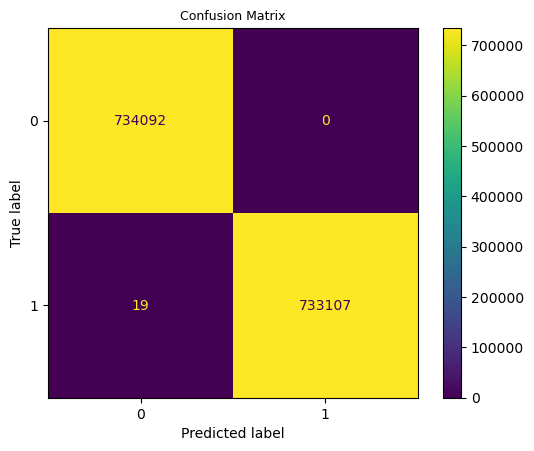

In [70]:
cm = ConfusionMatrixDisplay(cm)
cm.plot()
plt.title('Confusion Matrix',fontsize=9)
plt.show()

In [71]:
print(classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.99997   1.00000   0.99999    734092
           1    1.00000   0.99997   0.99999    733126

    accuracy                        0.99999   1467218
   macro avg    0.99999   0.99999   0.99999   1467218
weighted avg    0.99999   0.99999   0.99999   1467218



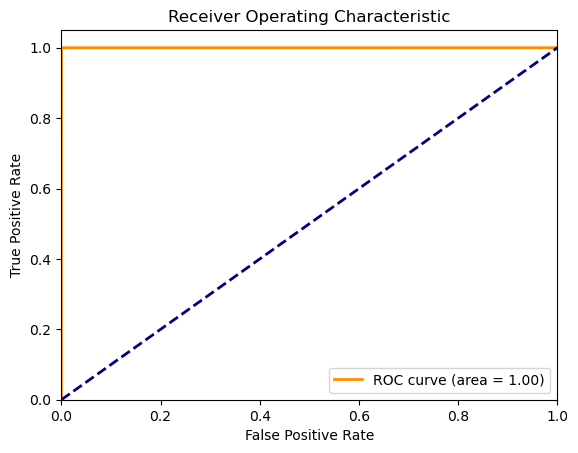

In [72]:
from sklearn.metrics import roc_curve, auc,matthews_corrcoef
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [73]:
mcc = matthews_corrcoef(y_test, y_pred)


In [74]:

print("Matthews Correlation Coefficient:", mcc)


Matthews Correlation Coefficient: 0.9999741009686054


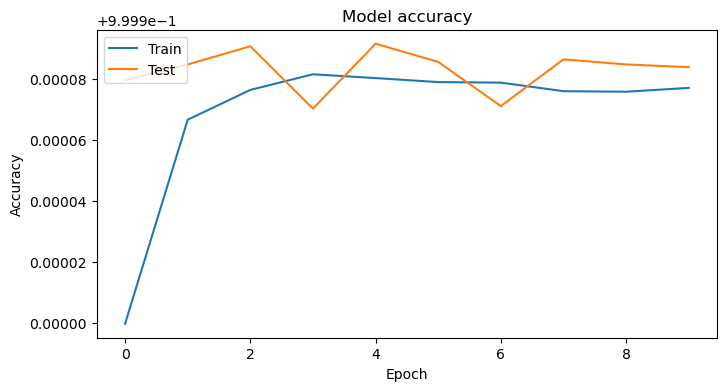

In [75]:
# Plot training & validation accuracy values
plt.figure(figsize= (8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

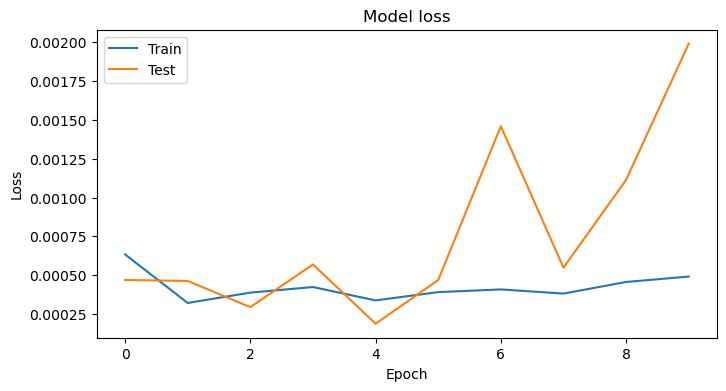

In [76]:
# Plot training & validation loss values
plt.figure(figsize= (8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

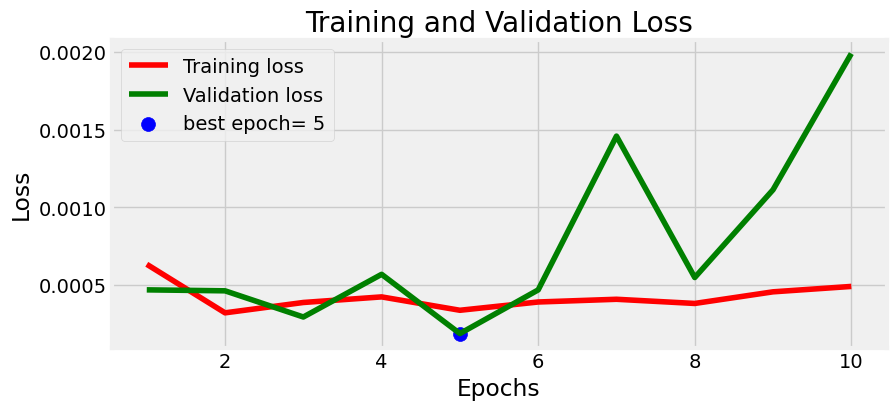

In [77]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (10, 4))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 100, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()